In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
athletes = pd.read_csv("athlete_events.csv")

In [5]:
plt.style.use('default')

In [6]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
athletes.shape

(271116, 15)

In [8]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
grp_by_sex = athletes.groupby(['Sex'])['Height'].mean()

In [11]:
grp_by_sex

Sex
F    167.839740
M    178.858463
Name: Height, dtype: float64

In [12]:
grp_by_sex = pd.DataFrame(grp_by_sex)

In [13]:
grp_by_sex = grp_by_sex.reset_index()

In [14]:
grp_by_sex

,Sex,Height
0,F,167.839740
1,M,178.858463


## Barplot of Height by Sex
Average height of male is more than average height of female

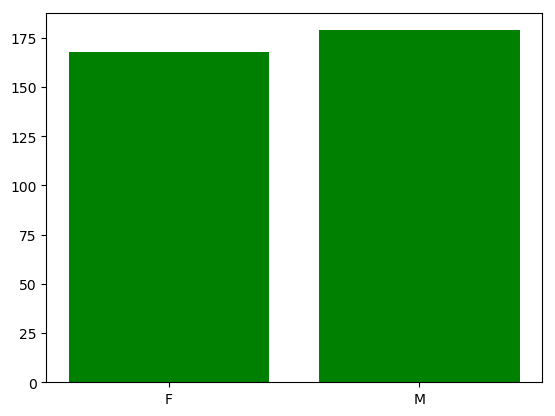

In [15]:
plt.bar(grp_by_sex['Sex'],grp_by_sex['Height'],color='green')
plt.show()

In [16]:
athletes = athletes.dropna(subset=['Age','Height','Weight'])

## Boxplot on athletes' age
1. Most of the athletes age lies between 22 to 28 years
2. Median age is 24
3. There are outliers in the data. Some of the athletes are older than 40 years

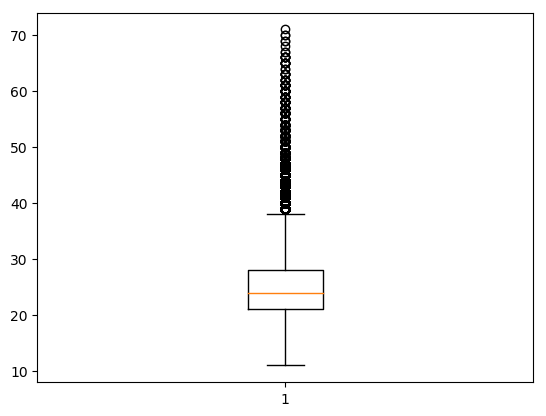

In [17]:
plt.boxplot(athletes['Age'])
plt.show()

## Histogram of athletes' height
Height is normally distributed,uni-modal and there is no skewness, 

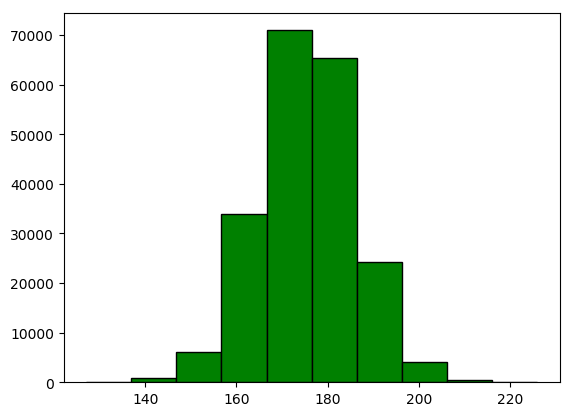

In [18]:
plt.hist(athletes['Height'],color='green',edgecolor='black')
plt.show()

In [19]:
basketball = athletes[athletes['Sport']=='Basketball']

In [20]:
basketball.shape

(3668, 15)

## Variation of Age with Height
There is no correletion between Age and Weight as this dataset contains athlete's data whose age is above 20 years.

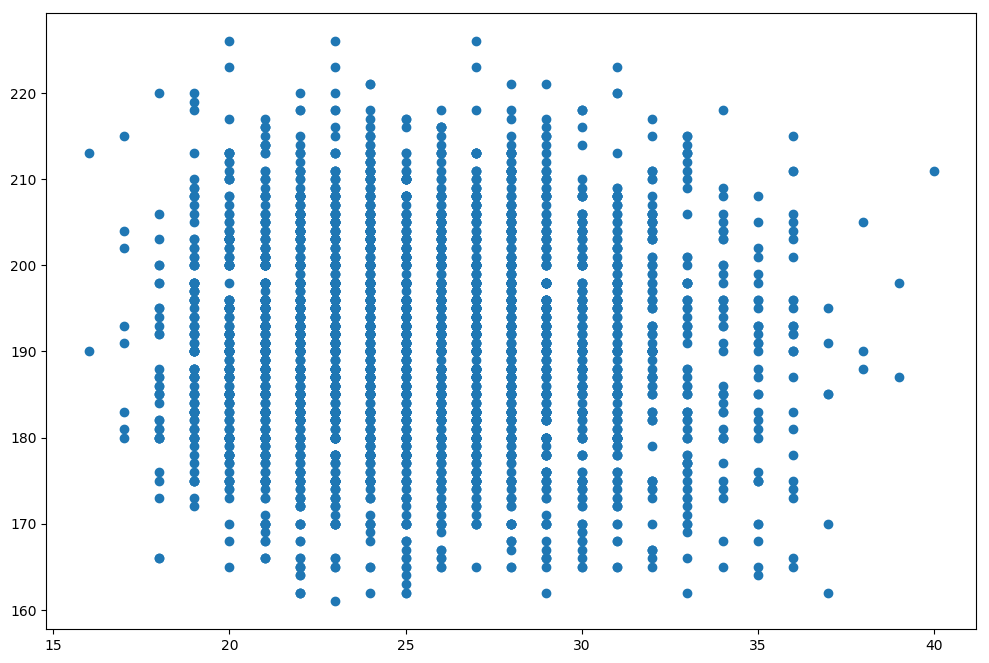

In [21]:
fig = plt.figure(figsize=(12,8))
plt.scatter(basketball['Age'],basketball['Height'])
plt.show()

## Variation of Weight with Height
There is strong positive correletion between Height and Weight
No significant outlier seen

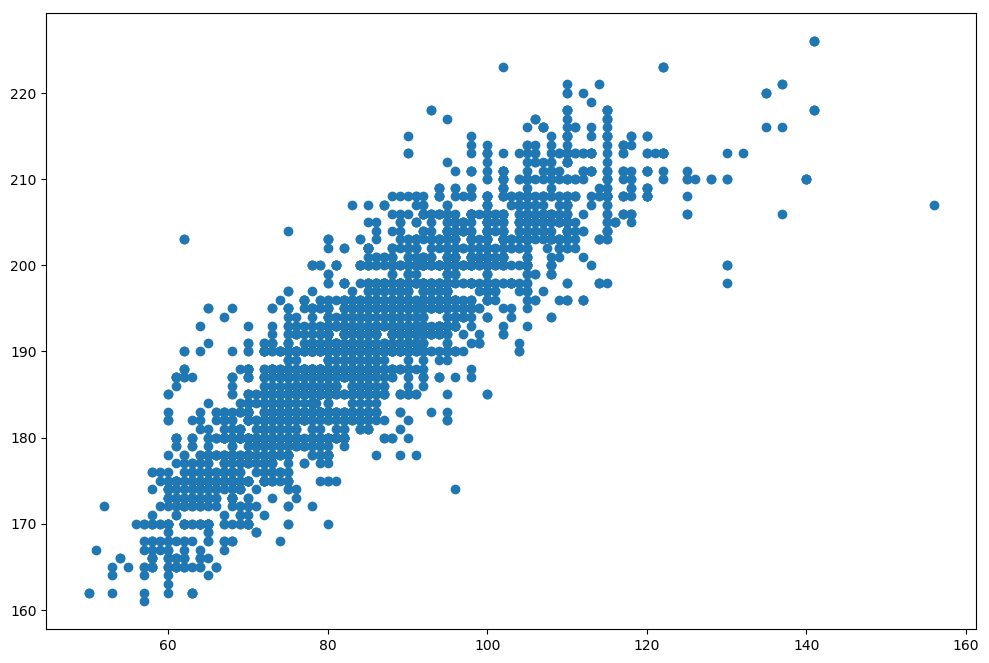

In [22]:
fig = plt.figure(figsize=(12,8))
plt.scatter(basketball['Weight'],basketball['Height'])
plt.show()

In [23]:
basketball['Weight'].corr(basketball['Height'])

0.8737526064510095

In [24]:
basketball['Age'].corr(basketball['Height'])

-0.015506489859216795

In [27]:
telco = pd.read_csv('Telco-Customer-Churn.csv')

In [28]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
telco.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [30]:
pmt_method = telco.groupby(['PaymentMethod']).size()
pmt_method = pd.DataFrame(pmt_method)
pmt_method = pmt_method.reset_index()
pmt_method = pmt_method.rename(columns={0:'Count'})

In [31]:
pmt_method

,PaymentMethod,Count
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522
2,Electronic check,2365
3,Mailed check,1612


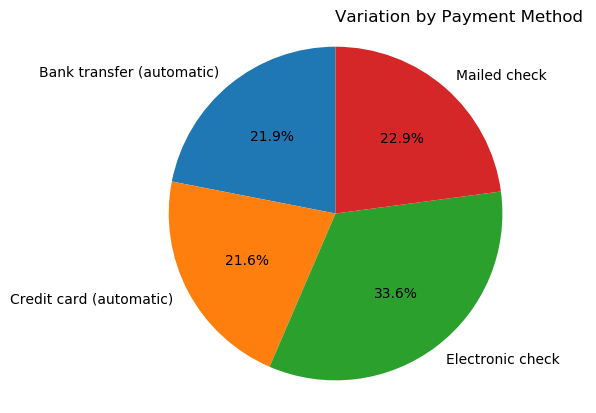

In [32]:
plt.pie(pmt_method['Count'],labels=pmt_method['PaymentMethod'],
        autopct='%0.1f%%',startangle=90)
plt.title("Variation by Payment Method",loc='right')
plt.axis('equal')
plt.show()

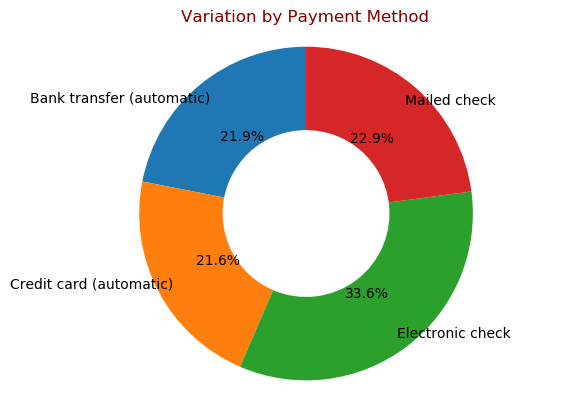

In [33]:
col=['red','green','yellow','blue']
plt.pie(pmt_method['Count'],labels=pmt_method['PaymentMethod'],labeldistance=0.9,
        autopct='%0.1f%%',startangle=90,wedgeprops=dict(width=0.5),radius=1)

plt.title("Variation by Payment Method",loc='center',color='maroon')
plt.axis('equal')
plt.show()

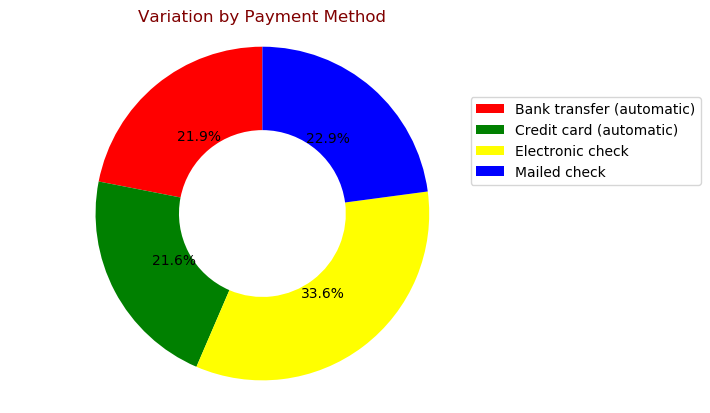

In [34]:
col=['red','green','yellow','blue']
pie = plt.pie(pmt_method['Count'],colors=col,
        autopct='%0.1f%%',startangle=90,wedgeprops=dict(width=0.5),radius=1)

plt.title("Variation by Payment Method",loc='center',color='maroon')
plt.axis('equal')
plt.legend(pie[0],labels=pmt_method['PaymentMethod'], loc="right",
           bbox_to_anchor=(1.4,0.7))

In [35]:
pmt_by_gdr = telco.groupby(['PaymentMethod','gender']).size()
pmt_by_gdr = pd.DataFrame(pmt_by_gdr)
pmt_by_gdr = pmt_by_gdr.reset_index()
pmt_by_gdr = pmt_by_gdr.rename(columns={0:'Count'})

In [36]:
pmt_by_gdr

,PaymentMethod,gender,Count
0,Bank transfer (automatic),Female,788
1,Bank transfer (automatic),Male,756
2,Credit card (automatic),Female,752
3,Credit card (automatic),Male,770
4,Electronic check,Female,1170
5,Electronic check,Male,1195
6,Mailed check,Female,778
7,Mailed check,Male,834


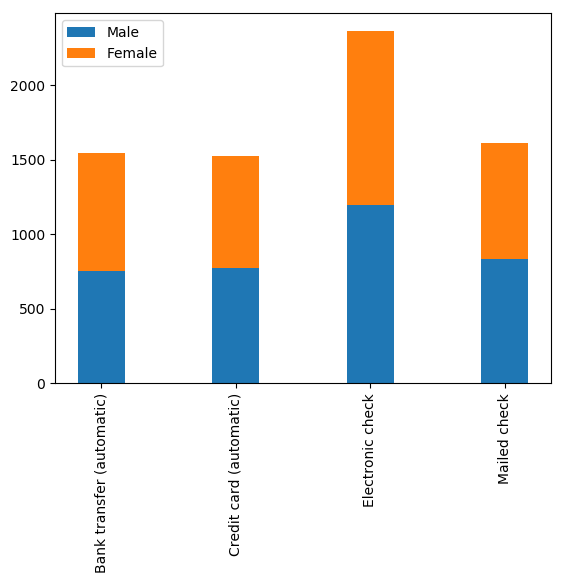

In [37]:
Gender = ['Male','Female']
plt.bar(pmt_by_gdr[pmt_by_gdr['gender']=='Male']['PaymentMethod'],
        pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
       width=0.35)
plt.bar(pmt_by_gdr[pmt_by_gdr['gender']=='Female']['PaymentMethod'],
        pmt_by_gdr[pmt_by_gdr['gender']=='Female']['Count'],
       bottom=pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
       width=0.35)
plt.legend(Gender,loc=2)
plt.xticks(rotation='vertical')
plt.show()

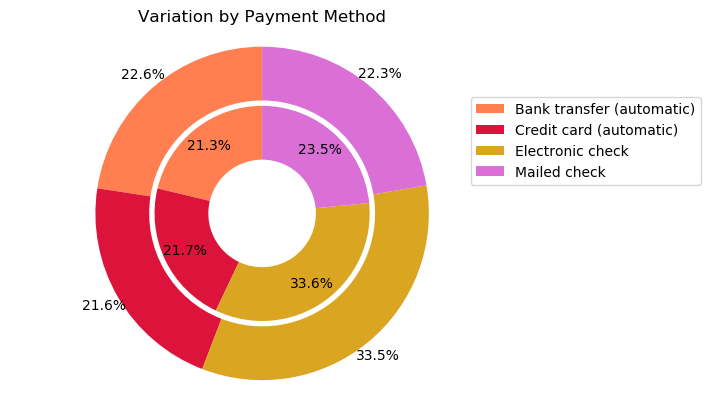

In [38]:
col=['coral','crimson','goldenrod','orchid']
plt.pie(pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
        autopct='%0.1f%%',pctdistance=0.8,startangle=90,
        wedgeprops=dict(width=0.5),radius=1,colors=col)
plt.pie(pmt_by_gdr[pmt_by_gdr['gender']=='Female']['Count'],
        autopct='%0.1f%%',pctdistance=1.1,startangle=90,
        wedgeprops=dict(width=0.5),radius=1.55,colors=col)
plt.title("Variation by Payment Method",loc='center')
plt.legend(pie[0],labels=pmt_by_gdr[pmt_by_gdr['gender']=='Female']['PaymentMethod'], loc="right",bbox_to_anchor=(1.4,0.7))
plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show>

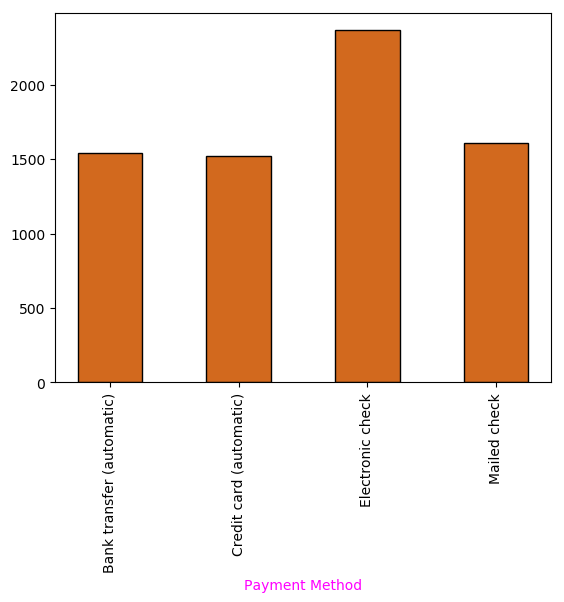

In [39]:
plt.bar(pmt_method['PaymentMethod'],pmt_method['Count'],
       width=0.5,edgecolor='black',color='chocolate')
plt.xticks(rotation='vertical')
plt.xlabel("Payment Method",color="magenta")
plt.show

<function matplotlib.pyplot.show>

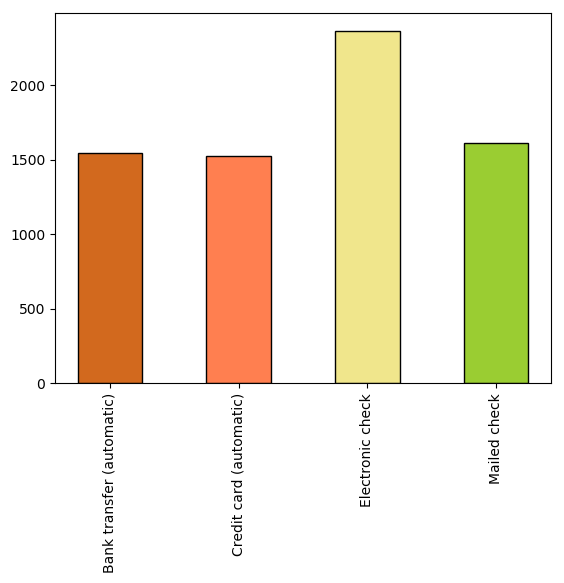

In [40]:
plt.bar(pmt_method['PaymentMethod'],pmt_method['Count'],
       width=0.5,edgecolor='black',color=['chocolate','coral','khaki','yellowgreen'])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show>

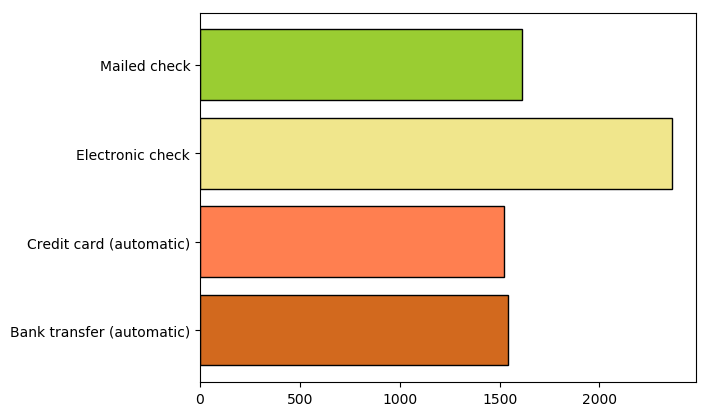

In [41]:
plt.barh(pmt_method['PaymentMethod'],pmt_method['Count'],
       edgecolor='black',color=['chocolate','coral','khaki','yellowgreen'])
plt.show

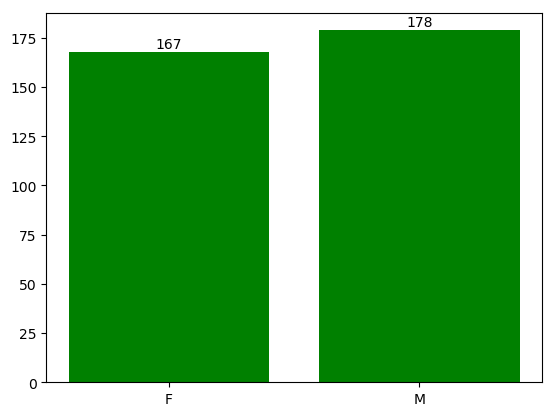

In [42]:
bar1 = plt.bar(grp_by_sex['Sex'],grp_by_sex['Height'],color='green')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.002*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(bar1)
plt.show()

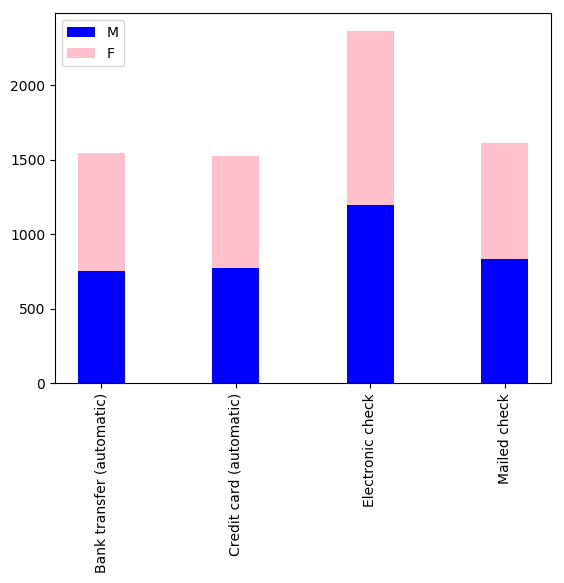

In [43]:
bar1 = plt.bar(pmt_by_gdr[pmt_by_gdr['gender']=='Male']['PaymentMethod'],pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
       width=0.35,color='blue',label='M')
bar2 = plt.bar(pmt_by_gdr[pmt_by_gdr['gender']=='Female']['PaymentMethod'],pmt_by_gdr[pmt_by_gdr['gender']=='Female']['Count'],
       bottom=pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
       width=0.35,color='pink',label='F')
plt.xticks(rotation='vertical')
plt.legend(loc=2)
plt.show()

In [44]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [45]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [46]:
plt.style.use('dark_background')

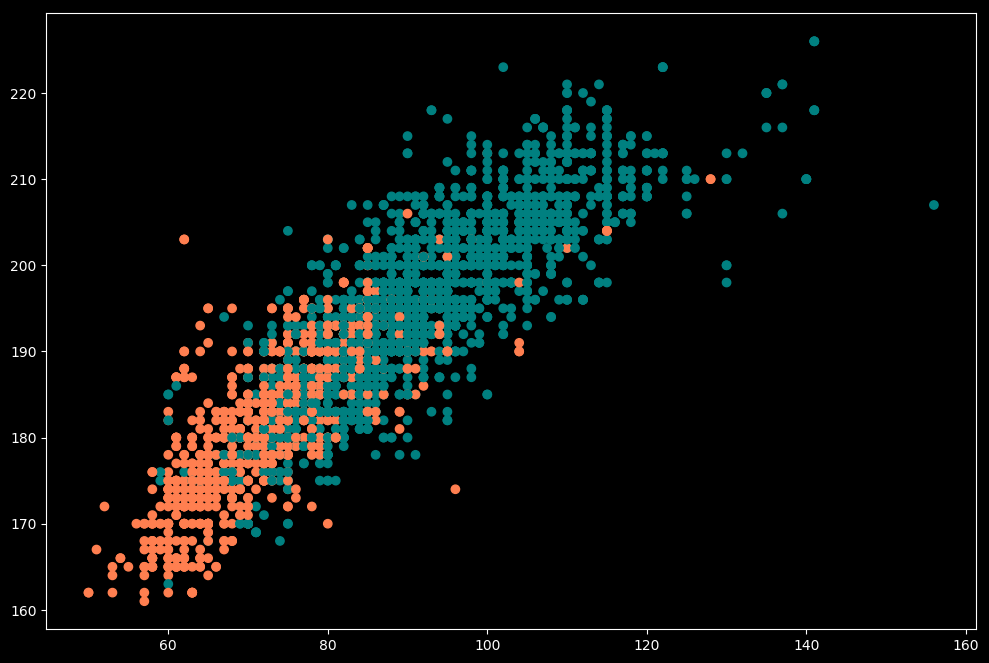

In [47]:
fig = plt.figure(figsize=(12,8))
colors = {'M':'teal', 'F':'coral'}
plt.scatter(basketball['Weight'],basketball['Height'],
            c=basketball['Sex'].apply(lambda x: colors[x]),label=colors)
plt.show()

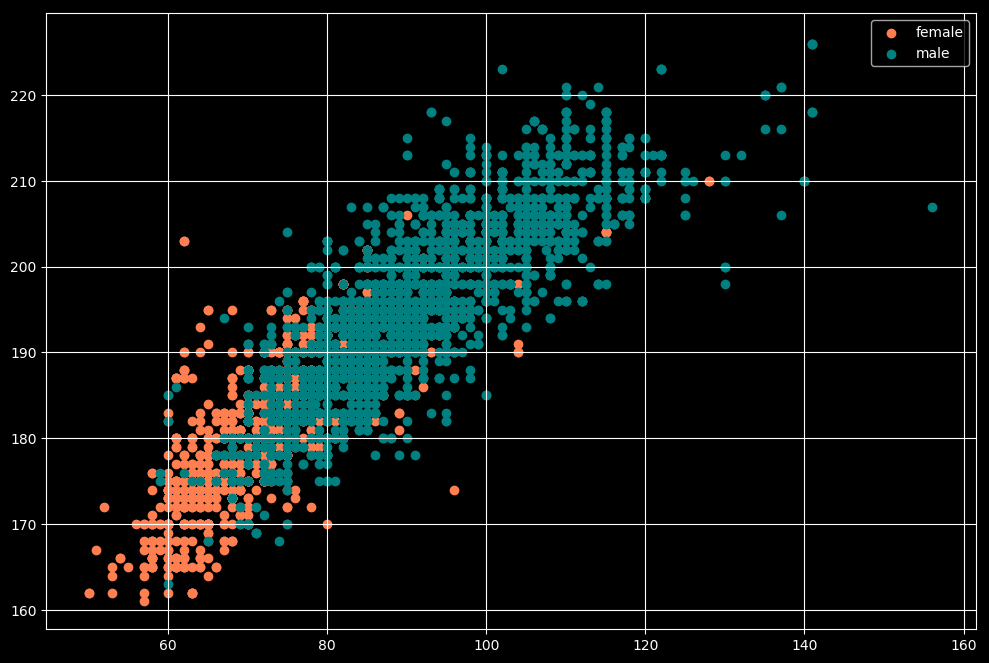

In [48]:
fig = plt.figure(figsize=(12,8))
plt.scatter(basketball[basketball['Sex']=='F']['Weight'],
            basketball[basketball['Sex']=='F']['Height'],
            c='coral',label='female')
plt.scatter(basketball[basketball['Sex']=='M']['Weight'],
            basketball[basketball['Sex']=='M']['Height'],
            c='teal',label='male')
plt.legend()
plt.grid(True)

plt.show()

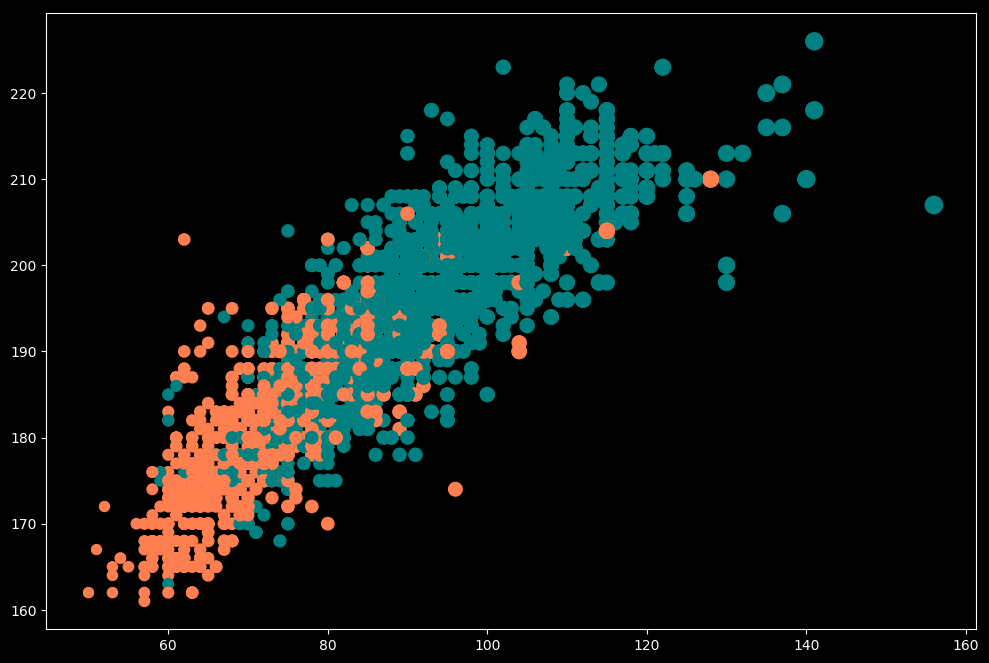

In [49]:
fig = plt.figure(figsize=(12,8))
colors = {'M':'teal', 'F':'coral'}
plt.scatter(basketball['Weight'],basketball['Height'],c=basketball['Sex'].apply(lambda x: colors[x]),s=basketball['Weight'])

plt.show()

In [52]:
air = pd.read_excel("AirQualityUCI.xlsx")

In [53]:
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [54]:
air.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [55]:
air = air[air['PT08.S1(CO)'] > 0]

In [56]:
air.shape

(8991, 15)

In [57]:
air_100 = air.head(100)

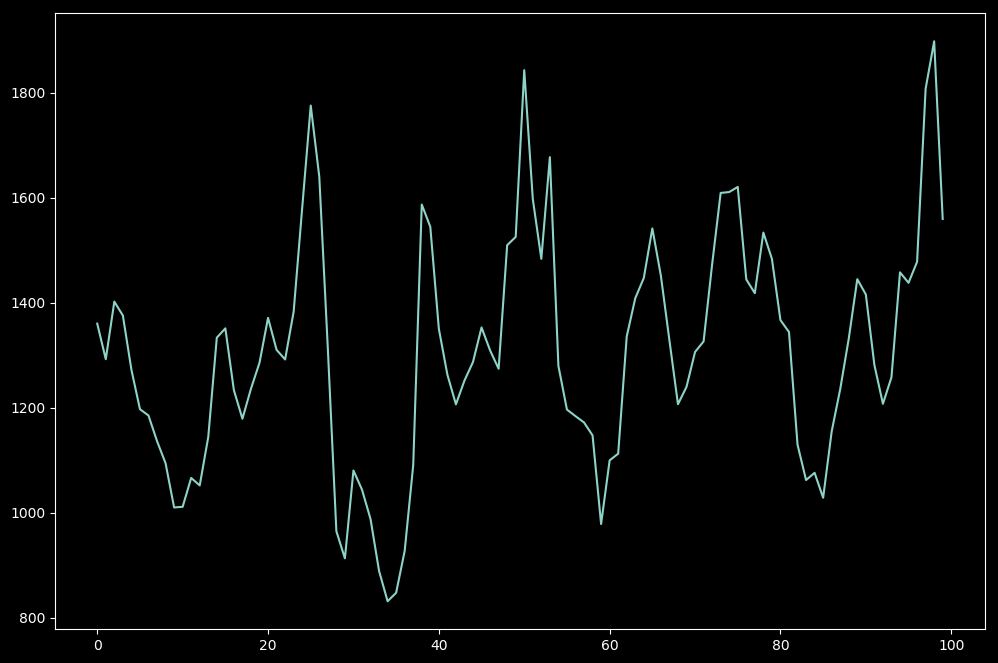

In [58]:
fig = plt.figure(figsize=(12,8))
plt.plot(air_100['PT08.S1(CO)'])
plt.show()

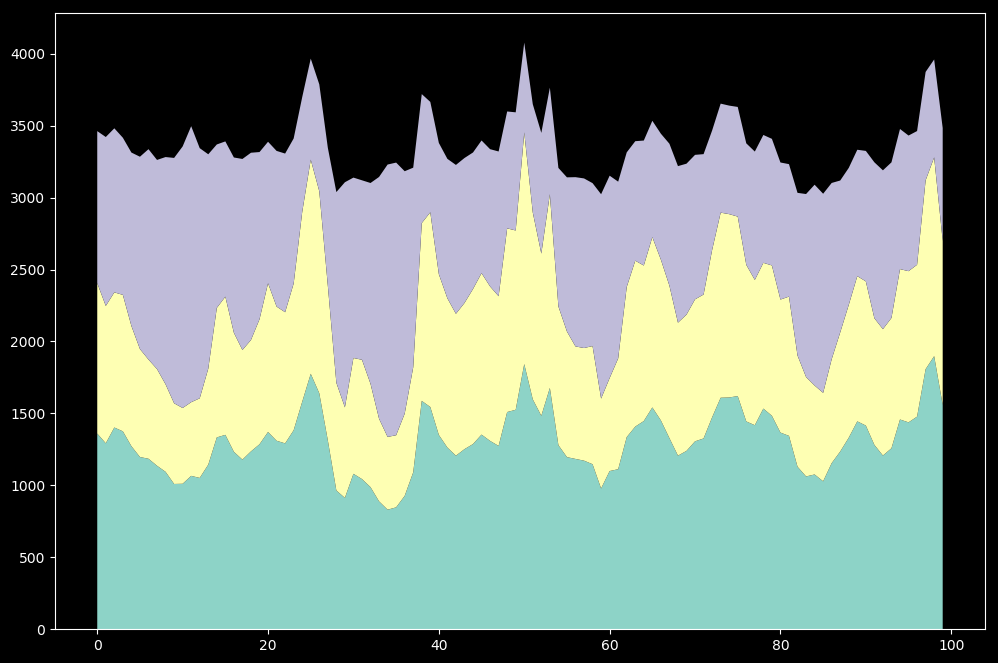

In [59]:
fig = plt.figure(figsize=(12,8))
plt.stackplot(air_100.index,air_100['PT08.S1(CO)'],air_100['PT08.S2(NMHC)'],air_100['PT08.S3(NOx)'])
plt.show()

In [60]:
air.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [61]:
india = athletes[athletes['Team']=='India']

In [62]:
india = india.loc[:,['Sex','Height','Weight','Age']]

In [63]:
india.head()

,Sex,Height,Weight,Age
895,F,167.0,53.0,19.0
896,F,167.0,53.0,19.0
897,F,167.0,53.0,23.0
898,F,167.0,53.0,23.0
899,F,167.0,53.0,27.0


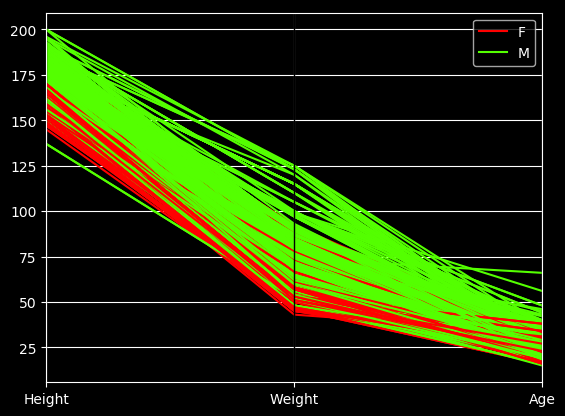

In [64]:
from pandas.tools.plotting import parallel_coordinates

 
# Make the plot
parallel_coordinates(india, 'Sex', colormap=plt.get_cmap("prism"))
plt.show()

In [65]:
plt.get_cmap

<function matplotlib.cm.get_cmap>

In [66]:
india = athletes[athletes['Team']=='India']

In [67]:
india.shape

(840, 15)

In [68]:
india.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN
898,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN
899,512,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN


In [69]:
india = india.loc[:,['Sex','Height','Weight','Age']]

In [70]:
india.head()

,Sex,Height,Weight,Age
895,F,167.0,53.0,19.0
896,F,167.0,53.0,19.0
897,F,167.0,53.0,23.0
898,F,167.0,53.0,23.0
899,F,167.0,53.0,27.0


In [71]:
from pandas.plotting import parallel_coordinates

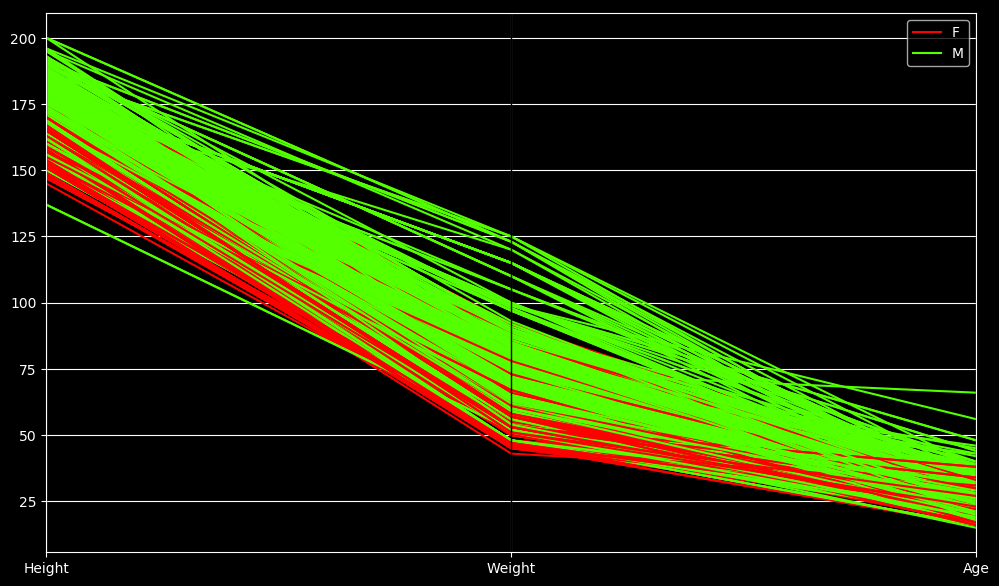

In [72]:
fig = plt.figure(figsize=(12,7))
parallel_coordinates(india,'Sex',colormap=plt.get_cmap('prism'))
plt.show()